In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("season-1819_csv.csv")
df.sample(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
190,E0,29/12/2018,Brighton,Everton,1,0,H,0,0,D,...,1.81,21,0.25,2.03,1.98,1.93,1.89,3.27,3.34,2.41
189,E0,27/12/2018,Southampton,West Ham,1,2,A,0,0,D,...,2.04,21,-0.25,2.01,1.94,1.98,1.94,2.32,3.37,3.43
227,E0,19/01/2019,Wolves,Leicester,4,3,H,2,0,H,...,1.59,20,-0.25,2.02,1.97,1.95,1.90,2.35,3.23,3.53
364,E0,04/05/2019,West Ham,Southampton,3,0,H,1,0,H,...,2.32,18,-0.50,2.35,2.29,1.73,1.66,2.40,3.69,3.00
255,E0,09/02/2019,Liverpool,Bournemouth,3,0,H,2,0,H,...,2.87,22,-2.00,1.95,1.91,2.00,1.95,1.17,8.75,16.00


In [3]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,2.126895,20.736842,-0.327632,2.025184,1.962447,2.002395,1.942053,3.332974,4.576342,5.620132
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,0.467750,1.571249,1.056248,0.247373,0.230633,0.226581,0.215442,3.137394,2.019487,5.779454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.450000,17.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.797500,20.000000,-1.000000,1.830000,1.787500,1.817500,1.770000,1.595000,3.410000,2.335000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,2.030000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.350000,3.765000,3.415000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,2.330000,22.000000,0.250000,2.190000,2.120000,2.152500,2.092500,3.380000,4.842500,6.565000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,4.170000,24.000000,2.500000,3.150000,3.010000,2.770000,2.650000,24.770000,14.920000,36.050000


In [4]:
#dropping columns which are not necessary for further analysis
df.drop('Date',axis=1,inplace=True)

In [5]:
df.drop('Div',axis=1,inplace=True)

In [6]:
# home matches wherein Liverpool have won the matches and were leading at half time
lfc_win=df[(df['HomeTeam']=='Liverpool') & (df['FTR']=='H') & (df['HTR']=='H')]
lfc_win.FTR.value_counts()

H    13
Name: FTR, dtype: int64

In [7]:
#total number of goals scored by home team
fthg_ht=df.groupby('HomeTeam').FTHG.sum()
fthg_ht.sort_values(ascending=False)

HomeTeam
Man City          57
Liverpool         55
Arsenal           42
Chelsea           39
Tottenham         34
Man United        33
West Ham          32
Bournemouth       30
Everton           30
Wolves            28
Southampton       27
Watford           26
Leicester         24
Newcastle         24
Burnley           24
Fulham            22
Cardiff           21
Crystal Palace    19
Brighton          19
Huddersfield      10
Name: FTHG, dtype: int64

In [8]:
#most goals scored by away team
fthg_at=df.groupby('AwayTeam').FTAG.sum()
fthg_at.sort_values(ascending=False)

AwayTeam
Man City          38
Liverpool         34
Tottenham         33
Crystal Palace    32
Man United        32
Arsenal           31
Leicester         27
Watford           26
Bournemouth       26
Chelsea           24
Everton           24
Burnley           21
West Ham          20
Wolves            19
Newcastle         18
Southampton       18
Brighton          16
Cardiff           13
Fulham            12
Huddersfield      12
Name: FTAG, dtype: int64

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


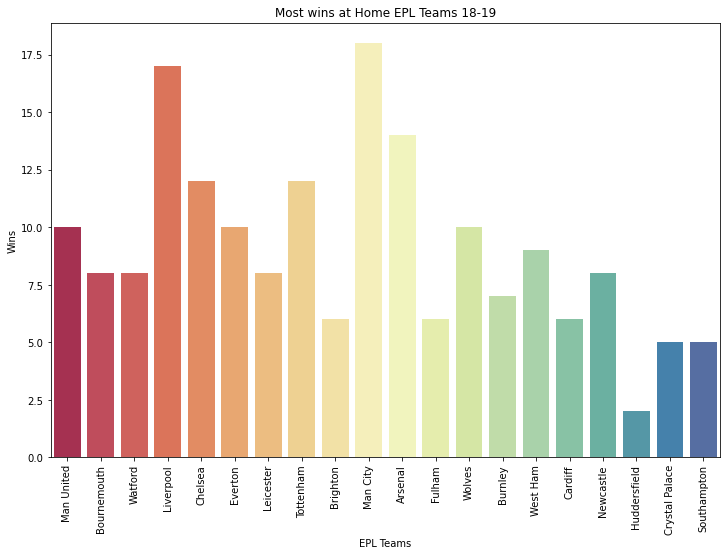

In [10]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(df['HomeTeam'][df['FTR']=='H'],data=df,palette='Spectral')
plt.title("Most wins at Home EPL Teams 18-19",fontsize=12)
plt.xlabel('EPL Teams')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

In [11]:
#total number of wins, draws and losses for the year
temp=pd.DataFrame({"Final results 18-19 season":df['FTR']})
count_wins=temp.value_counts()
print(count_wins)

Final results 18-19 season
H                             181
A                             128
D                              71
dtype: int64


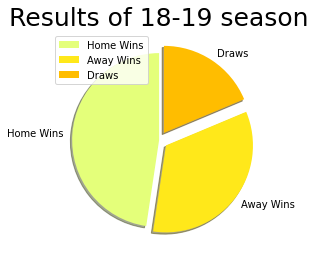

In [12]:
labels = ['Home Wins','Away Wins','Draws'] 
size = df.FTR.value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0.1, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Results of 18-19 season', fontsize = 25)
plt.legend(loc='upper left')
plt.savefig('results18_191.png',bbox_inches='tight',pad_inches=1,transparent=True)

In [13]:
#finding out win percentage
teams=df["HomeTeam"].unique()
team_performance=pd.DataFrame([],columns=['Home Team','No.of Games Won at Home'])
for id,element in enumerate(teams):
    temp_team=df[(df['HomeTeam']==element) & (df['FTR']=='H')]
    team_performance=team_performance.append({'Home Team':element,
                                            'No.of Games Won at Home':temp_team['HomeTeam'].count(),'Total Home Games':19, 'percentage_win':"{:.2f}".format(temp_team['HomeTeam'].count()/19) },ignore_index=True)

In [14]:
team_performance=team_performance.sort_values(by='No.of Games Won at Home')
team_performance

,Home Team,No.of Games Won at Home,Total Home Games,percentage_win
3,Huddersfield,2,19.0,0.11
9,Southampton,5,19.0,0.26
19,Crystal Palace,5,19.0,0.26
16,Brighton,6,19.0,0.32
10,Cardiff,6,19.0,0.32
2,Fulham,6,19.0,0.32
17,Burnley,7,19.0,0.37
1,Bournemouth,8,19.0,0.42
4,Newcastle,8,19.0,0.42
5,Watford,8,19.0,0.42


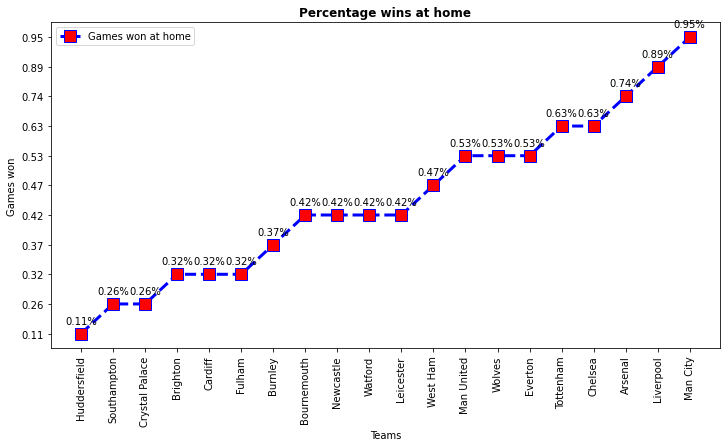

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(12,6))
x = team_performance["Home Team"]
y = team_performance["percentage_win"]
plt.plot(x, y, color='b',label='Games won at home',marker='s', markerfacecolor='red',markersize=12,linestyle='dashed', linewidth = 3)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.title('Percentage wins at home',fontweight='bold')
plt.xlabel('Teams')
plt.ylabel('Games won')
plt.draw()
plt.grid(False)

for x1,y1 in zip(x,y):

    label = "{:.2f}%".format(float(y1))

    plt.annotate(label, # this is the text
                 (x1,y1), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [16]:
teams=df["HomeTeam"].unique()
team_performance2=pd.DataFrame([],columns=['Home Team','No.of Games Lost at Home'])
for id,element in enumerate(teams):
    temp_team1=df[(df['HomeTeam']==element) & (df['FTR']=='A')]
    team_performance2=team_performance2.append({'Home Team':element,
                                            'No.of Games Lost at Home':temp_team1['HomeTeam'].count(),'Total no of Games':19, 'percentage_loss':"{:.0%}".format(temp_team1['HomeTeam'].count()/19)},ignore_index=True)

In [17]:
team_performance2.sample(4)

,Home Team,No.of Games Lost at Home,Total no of Games,percentage_loss
17,Burnley,10,19.0,53%
13,Leicester,8,19.0,42%
15,West Ham,6,19.0,32%
9,Southampton,6,19.0,32%


In [18]:
df.describe() #sample stats

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,2.126895,20.736842,-0.327632,2.025184,1.962447,2.002395,1.942053,3.332974,4.576342,5.620132
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,0.467750,1.571249,1.056248,0.247373,0.230633,0.226581,0.215442,3.137394,2.019487,5.779454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.450000,17.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.797500,20.000000,-1.000000,1.830000,1.787500,1.817500,1.770000,1.595000,3.410000,2.335000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,2.030000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.350000,3.765000,3.415000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,2.330000,22.000000,0.250000,2.190000,2.120000,2.152500,2.092500,3.380000,4.842500,6.565000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,4.170000,24.000000,2.500000,3.150000,3.010000,2.770000,2.650000,24.770000,14.920000,36.050000


In [19]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [20]:
#percentiles for fthg
pd.DataFrame(df['FTHG']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,FTHG
count,380.000000
mean,1.568421
std,1.312836
min,0.000000
1%,0.000000
10%,0.000000
30%,1.000000
50%,1.000000
75%,2.000000
90%,3.000000


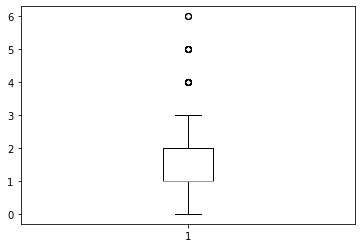

In [21]:
#boxplot
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(df['FTHG'])
plt.show()

In [22]:
categorical=[var for var in df.columns if df[var].dtype=='O']

In [23]:
numerical=[var for var in df.columns if df[var].dtype !='O']

In [24]:
categorical

['HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']

In [25]:
print('Categorical Variables-{}'.format(len(categorical)))

Categorical Variables-5


In [26]:
df1=df[categorical].head(10000)

In [27]:
s1=df1.HTR
counts1=s1.value_counts()
percent100=s1.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percent100

D    38.9%
H    33.2%
A    27.9%
Name: HTR, dtype: object

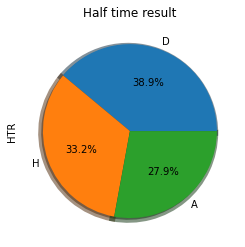

In [28]:
import matplotlib.pyplot as plt
(s1.value_counts().plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=False, wedgeprops={'linewidth': 6}, radius=1))
plt.title('Half time result')
plt.show()

In [29]:
df1[df1['FTR'].isin(['H','A'])].head()

,HomeTeam,AwayTeam,FTR,HTR,Referee
0,Man United,Leicester,H,H,A Marriner
1,Bournemouth,Cardiff,H,H,K Friend
2,Fulham,Crystal Palace,A,A,M Dean
3,Huddersfield,Chelsea,A,A,C Kavanagh
4,Newcastle,Tottenham,A,A,M Atkinson


In [30]:
area_list=['H','A']

In [31]:
import re
area_df=pd.DataFrame(dict((area,df1.FTR.str.contains(area)) for area in area_list))
area_df.head()

,H,A
0,True,False
1,True,False
2,False,True
3,False,True
4,False,True


In [32]:
#HS,AS,HF,AF,HST,AST

In [33]:
#half time shots on target
df.groupby('HomeTeam').HST.sum()

HomeTeam
Arsenal            96
Bournemouth        82
Brighton           53
Burnley            66
Cardiff            68
Chelsea           118
Crystal Palace     76
Everton            85
Fulham             86
Huddersfield       57
Leicester          99
Liverpool         126
Man City          148
Man United        126
Newcastle          80
Southampton        89
Tottenham         105
Watford            83
West Ham           88
Wolves             85
Name: HST, dtype: int64

In [34]:
df.groupby('HomeTeam').HS.sum().head(5)

HomeTeam
Arsenal        256
Bournemouth    229
Brighton       200
Burnley        210
Cardiff        230
Name: HS, dtype: int64

In [35]:
g=df.groupby('HomeTeam')
g

In [36]:
g1=df.groupby('AwayTeam')

In [37]:
#mean of each team for all variables
g.mean()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
HomeTeam,,,,,,,,,,,,,,,,,,,,,
Arsenal,2.210526,0.842105,0.736842,0.421053,13.473684,11.421053,5.052632,3.947368,11.473684,13.473684,...,2.496316,21.368421,-0.907895,1.988421,1.925789,2.018947,1.958421,1.944211,4.896842,7.251053
Bournemouth,1.578947,1.315789,0.789474,0.526316,12.052632,13.105263,4.315789,4.315789,9.842105,12.210526,...,2.141053,20.631579,0.013158,2.035789,1.970526,1.984737,1.930000,3.697368,4.016842,3.063684
Brighton,1.000000,1.473684,0.526316,0.631579,10.526316,11.789474,2.789474,4.157895,11.631579,8.789474,...,1.807368,20.052632,0.289474,1.993684,1.938947,2.058947,1.999474,4.315789,3.742105,2.852632
Burnley,1.263158,1.684211,0.736842,0.631579,11.052632,15.105263,3.473684,4.947368,9.684211,10.157895,...,1.872105,20.210526,0.421053,1.945789,1.890000,2.084737,2.027895,4.898947,3.884737,2.508421
Cardiff,1.105263,2.000000,0.421053,0.947368,12.105263,13.368421,3.578947,4.842105,10.263158,12.210526,...,1.892105,20.368421,0.473684,2.040000,1.985263,1.965789,1.911579,5.640000,4.144211,2.274211
Chelsea,2.052632,0.631579,0.842105,0.315789,17.105263,8.263158,6.210526,2.578947,8.105263,10.631579,...,2.343684,21.473684,-1.236842,2.003684,1.936842,2.017368,1.946842,1.605263,5.508421,10.632105
Crystal Palace,1.000000,1.210526,0.421053,0.315789,15.473684,11.736842,4.000000,3.473684,9.473684,11.105263,...,1.926842,20.263158,-0.026316,1.975789,1.925263,2.045263,1.984737,3.578421,3.900000,3.605263
Everton,1.578947,1.105263,0.736842,0.578947,14.684211,10.000000,4.473684,3.578947,11.473684,11.894737,...,1.984737,21.105263,-0.355263,2.088421,2.012105,1.951053,1.891053,2.838421,3.958947,4.566316
Fulham,1.157895,1.894737,0.473684,1.052632,14.421053,13.315789,4.526316,5.684211,10.473684,8.368421,...,2.164211,20.315789,0.421053,1.970526,1.915263,2.028947,1.973158,4.848421,4.340526,2.468947


In [38]:
df['FTHG'].median()

1.0

In [39]:
df['FTAG'].median()

1.0

In [40]:
referee_df=pd.DataFrame(df['Referee'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
referee_df.sample(5)

,Referee
G Scott,4.5%
A Marriner,7.1%
K Friend,7.1%
C Pawson,6.8%
M Oliver,7.9%


Text(0.5, 1.0, 'Goals per match at home LFC')

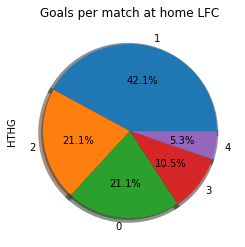

In [41]:
#goals distribution for Liverpool
filt=df['HomeTeam']=='Liverpool'
lfc_goalratio=(df.loc[filt]['HTHG'].value_counts(normalize=True))
(lfc_goalratio.plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=False, wedgeprops={'linewidth': 6}, radius=1))
plt.title('Goals per match at home LFC')

In [42]:
mean_median_fthg=g['FTHG'].agg(['median','mean'])
mean_median_fthg.sort_values(by='mean',ascending=False)

,median,mean
HomeTeam,,
Man City,3,3.000000
Liverpool,3,2.894737
Arsenal,2,2.210526
Chelsea,2,2.052632
Tottenham,1,1.789474
Man United,2,1.736842
West Ham,2,1.684211
Bournemouth,2,1.578947
Everton,2,1.578947


In [43]:
filt1=df['HomeTeam']=='Chelsea'
df.loc[filt1]['FTR'].str.contains('H').sum()

12

## MERGING DATASETS

In [44]:
z1=g['FTR'].apply(lambda x: x.str.contains('H').sum())
avg1=z1/19*100
avg1

HomeTeam
Arsenal           73.684211
Bournemouth       42.105263
Brighton          31.578947
Burnley           36.842105
Cardiff           31.578947
Chelsea           63.157895
Crystal Palace    26.315789
Everton           52.631579
Fulham            31.578947
Huddersfield      10.526316
Leicester         42.105263
Liverpool         89.473684
Man City          94.736842
Man United        52.631579
Newcastle         42.105263
Southampton       26.315789
Tottenham         63.157895
Watford           42.105263
West Ham          47.368421
Wolves            52.631579
Name: FTR, dtype: float64

In [45]:
z2=g1['FTR'].apply(lambda x: x.str.contains('A').sum())
avg2=z2/19*100
avg2

AwayTeam
Arsenal           36.842105
Bournemouth       26.315789
Brighton          15.789474
Burnley           21.052632
Cardiff           21.052632
Chelsea           47.368421
Crystal Palace    47.368421
Everton           26.315789
Fulham             5.263158
Huddersfield       5.263158
Leicester         36.842105
Liverpool         68.421053
Man City          73.684211
Man United        47.368421
Newcastle         21.052632
Southampton       21.052632
Tottenham         57.894737
Watford           31.578947
West Ham          31.578947
Wolves            31.578947
Name: FTR, dtype: float64

In [46]:
#MERGING DATASETS
python_df=pd.concat([avg1,avg2],axis='columns',sort=False)

In [47]:
python_df

,FTR,FTR
Arsenal,73.684211,36.842105
Bournemouth,42.105263,26.315789
Brighton,31.578947,15.789474
Burnley,36.842105,21.052632
Cardiff,31.578947,21.052632
Chelsea,63.157895,47.368421
Crystal Palace,26.315789,47.368421
Everton,52.631579,26.315789
Fulham,31.578947,5.263158
Huddersfield,10.526316,5.263158


In [48]:
#python_df.rename(columns={python_df.columns[1]:'% Win','FTR':'FTRA'})

In [49]:
cols = []
count = 1
for column in python_df.columns:
    if column == 'FTR':
        cols.append(f'FTR {count}')
        count+=1
        continue
    cols.append(column)
python_df.columns = cols

In [50]:
python_df

,FTR 1,FTR 2
Arsenal,73.684211,36.842105
Bournemouth,42.105263,26.315789
Brighton,31.578947,15.789474
Burnley,36.842105,21.052632
Cardiff,31.578947,21.052632
Chelsea,63.157895,47.368421
Crystal Palace,26.315789,47.368421
Everton,52.631579,26.315789
Fulham,31.578947,5.263158
Huddersfield,10.526316,5.263158


In [51]:
python_df.rename(columns={'FTR 1':'% Win at Home','FTR 2':'%Win away'},inplace=True)
python_df

,% Win at Home,%Win away
Arsenal,73.684211,36.842105
Bournemouth,42.105263,26.315789
Brighton,31.578947,15.789474
Burnley,36.842105,21.052632
Cardiff,31.578947,21.052632
Chelsea,63.157895,47.368421
Crystal Palace,26.315789,47.368421
Everton,52.631579,26.315789
Fulham,31.578947,5.263158
Huddersfield,10.526316,5.263158


In [52]:
python_df.index

Index(['Arsenal', 'Bournemouth', 'Brighton', 'Burnley', 'Cardiff', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Southampton',
       'Tottenham', 'Watford', 'West Ham', 'Wolves'],
      dtype='object')

In [53]:
python_df_array=python_df.to_numpy()
display(python_df_array)

array([[73.68421053, 36.84210526],
       [42.10526316, 26.31578947],
       [31.57894737, 15.78947368],
       [36.84210526, 21.05263158],
       [31.57894737, 21.05263158],
       [63.15789474, 47.36842105],
       [26.31578947, 47.36842105],
       [52.63157895, 26.31578947],
       [31.57894737,  5.26315789],
       [10.52631579,  5.26315789],
       [42.10526316, 36.84210526],
       [89.47368421, 68.42105263],
       [94.73684211, 73.68421053],
       [52.63157895, 47.36842105],
       [42.10526316, 21.05263158],
       [26.31578947, 21.05263158],
       [63.15789474, 57.89473684],
       [42.10526316, 31.57894737],
       [47.36842105, 31.57894737],
       [52.63157895, 31.57894737]])

<ipython-input-54-416f0a9f3e0f>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


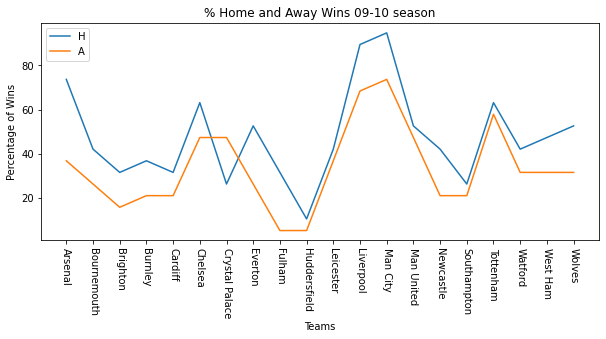

In [54]:
from matplotlib import rcParams
rcParams['figure.figsize']=10,4
plt.plot(python_df)
plt.xticks(rotation=270)
plt.title('% Home and Away Wins 09-10 season')
ax = plt.axes()
ax.set_facecolor("white")
plt.legend('HA',loc=2)
plt.grid(False)
plt.xlabel('Teams')
plt.ylabel('Percentage of Wins')
plt.show()

In [55]:
on_target=df.groupby('HomeTeam').HST.sum()

In [56]:
home_shots=df.groupby('HomeTeam').HS.sum()

In [57]:
python_df1=pd.concat([home_shots,on_target],axis='columns',sort=False)

In [58]:
python_df1.rename(columns={'HS':'H_S','HST':'HS_T'},inplace=True)

In [59]:
python_df1

,H_S,HS_T
HomeTeam,,
Arsenal,256,96
Bournemouth,229,82
Brighton,200,53
Burnley,210,66
Cardiff,230,68
Chelsea,325,118
Crystal Palace,294,76
Everton,279,85
Fulham,274,86


In [60]:
python_df1['P_C']=(python_df1['HS_T']/python_df1['H_S'])*100
python_df1.rename(columns={'P_C':'P_C'},inplace=True)

In [61]:
#python_df1.sort_values(by='H_S',ascending=False,inplace=True)

In [62]:
python_df1

,H_S,HS_T,P_C
HomeTeam,,,
Arsenal,256,96,37.500000
Bournemouth,229,82,35.807860
Brighton,200,53,26.500000
Burnley,210,66,31.428571
Cardiff,230,68,29.565217
Chelsea,325,118,36.307692
Crystal Palace,294,76,25.850340
Everton,279,85,30.465950
Fulham,274,86,31.386861


In [63]:
z1=python_df1['P_C'].mean()
z1

33.4951129578865

In [64]:
on_target=df.groupby('HomeTeam').HST.sum()
goals_scored=df.groupby('HomeTeam').FTHG.sum()

In [65]:
python_df3=pd.concat([goals_scored,on_target],axis='columns',sort=False)

In [66]:
python_df3.head(5)

,FTHG,HST
HomeTeam,,
Arsenal,42,96
Bournemouth,30,82
Brighton,19,53
Burnley,24,66
Cardiff,21,68


In [67]:
python_df3.rename(columns={'FTHG':'FTH_G','HST':'HS_T'},inplace=True)

In [68]:
python_df3['conv_rate']=(python_df3['FTH_G']/python_df3['HS_T'])*100
python_df3

,FTH_G,HS_T,conv_rate
HomeTeam,,,
Arsenal,42,96,43.750000
Bournemouth,30,82,36.585366
Brighton,19,53,35.849057
Burnley,24,66,36.363636
Cardiff,21,68,30.882353
Chelsea,39,118,33.050847
Crystal Palace,19,76,25.000000
Everton,30,85,35.294118
Fulham,22,86,25.581395


In [69]:
 python_df3.sort_values(by='HS_T',ascending=False,inplace=True)

In [70]:
colors=['red' if (bar==max(python_df3['conv_rate'])) else 'grey' for bar in python_df3['conv_rate']]

In [71]:
colors1=['red' if (bar> python_df3['conv_rate'].mean()) else 'grey' for bar in python_df3['conv_rate']]

In [72]:
z1

33.4951129578865

<ipython-input-73-50102a3c2836>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


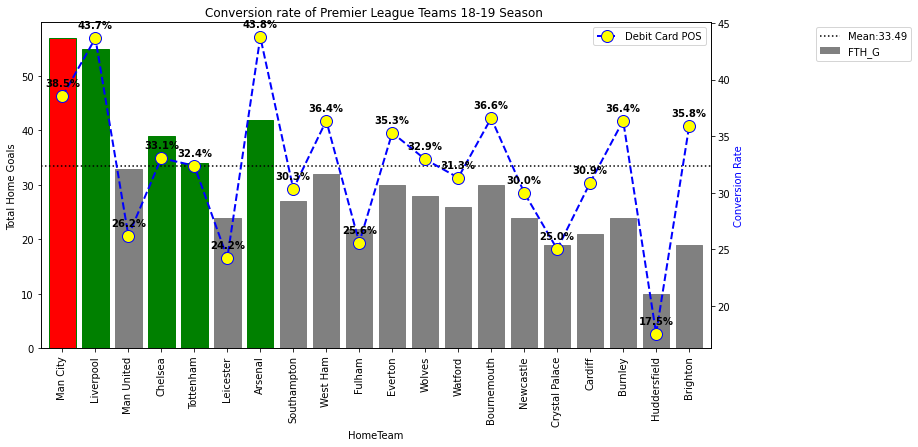

In [73]:
plot=python_df3.plot.bar(x=None,y='FTH_G',color=colors,rot=90,width=0.8,figsize=(12,6),grid='None')
plt.title('Conversion rate of Premier League Teams 18-19 Season ')
plt.axhline(z1,color='k',linestyle=":",label='Mean:33.49')
plt.ylabel('Total Home Goals')
plt.legend(bbox_to_anchor=(1.15,1),loc='upper left')
ax=plt.axes()
ax.set_facecolor("white")
plt.grid(False)
plt.xticks(rotation=90)

x = python_df3.index
y = python_df3["conv_rate"]
axes2 = plt.twinx()
axes2.plot(x, y, color='b',label='Debit Card POS',marker='o', markerfacecolor='yellow',markersize=12,linestyle='dashed', linewidth = 2)
plt.legend(loc='upper right')
axes2.set_ylabel('Conversion Rate',color='blue')
for x1,y1 in zip(x,y):

    label = "{:.1f}%".format(y1)

    plt.annotate(label, # this is the text
                 (x1,y1), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',fontweight='bold') # horizontal alignment can be left, right or center
plt.grid(False)


patch_h = [] 
for bar in plot.patches:
    if bar.get_height() > z1:
        bar.set_color('g')    
    else:
        bar.set_color('grey')

for bar in plot.patches:
    reading = bar.get_height()
    patch_h.append(reading)        
idx_tallest = np.argmax(patch_h)
plot.patches[idx_tallest].set_facecolor('r')

plt.savefig('Conversion_rate1.png',bbox_inches='tight',pad_inches=2)



<AxesSubplot:>

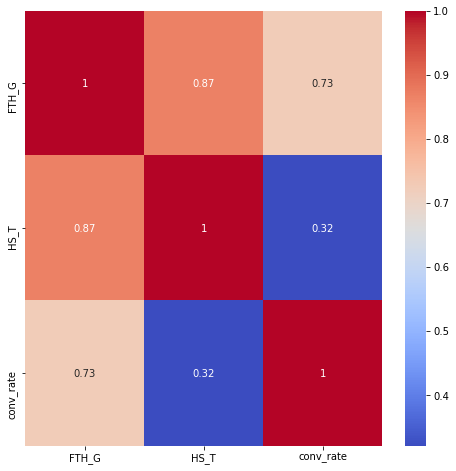

In [74]:
import seaborn
python_df3.corr()
plt.figure(figsize=(8,8))
seaborn.heatmap(python_df3.corr(),annot=True,cmap="coolwarm")

## TRANSFORMING DATA

In [75]:
df.groupby('HomeTeam').FTAG.sum().head(1)

HomeTeam
Arsenal    16
Name: FTAG, dtype: int64

In [76]:
df.groupby('AwayTeam').FTHG.sum().head(2)

AwayTeam
Arsenal        35
Bournemouth    45
Name: FTHG, dtype: int64

In [77]:
hfouls=df.groupby('HomeTeam').HF.sum().head(5)

In [78]:
hfouls

HomeTeam
Arsenal        218
Bournemouth    187
Brighton       221
Burnley        184
Cardiff        195
Name: HF, dtype: int64

In [79]:
afouls=df.groupby('AwayTeam').AF.sum().head(5)

In [80]:
afouls

AwayTeam
Arsenal        194
Bournemouth    152
Brighton       242
Burnley        175
Cardiff        189
Name: AF, dtype: int64

In [81]:
game_df=pd.concat([hfouls,afouls],axis='columns',sort=False)

In [82]:
game_df

,HF,AF
Arsenal,218,194
Bournemouth,187,152
Brighton,221,242
Burnley,184,175
Cardiff,195,189


In [83]:
game_df.rename(columns={'HF':'hfouls','AF':'afouls'},inplace=True)

In [84]:
game_df['tfouls']=(game_df['hfouls']+game_df['afouls'])
game_df

,hfouls,afouls,tfouls
Arsenal,218,194,412
Bournemouth,187,152,339
Brighton,221,242,463
Burnley,184,175,359
Cardiff,195,189,384


In [85]:
game_df.sort_values(by='hfouls',ascending=False,inplace=True)

In [86]:
game_df

,hfouls,afouls,tfouls
Brighton,221,242,463
Arsenal,218,194,412
Cardiff,195,189,384
Bournemouth,187,152,339
Burnley,184,175,359


In [87]:
hyellow=df.groupby('HomeTeam').HY.sum().head(5)

In [88]:
df.groupby('HomeTeam').HR.sum().head(2)

HomeTeam
Arsenal        0
Bournemouth    1
Name: HR, dtype: int64

In [89]:
ayellow=df.groupby('AwayTeam').AY.sum().head(5)

In [90]:
game_df=pd.concat([hfouls,afouls,hyellow,ayellow],axis='columns',sort=False)

In [91]:
game_df

,HF,AF,HY,AY
Arsenal,218,194,40,32
Bournemouth,187,152,36,24
Brighton,221,242,30,30
Burnley,184,175,33,42
Cardiff,195,189,33,32


In [92]:
game_df.rename(columns={'HF':'hfouls','AF':'afouls','HY':'hyellow','AY':'ayellow'},inplace=True)

In [93]:
game_df

,hfouls,afouls,hyellow,ayellow
Arsenal,218,194,40,32
Bournemouth,187,152,36,24
Brighton,221,242,30,30
Burnley,184,175,33,42
Cardiff,195,189,33,32


In [94]:
game_df['tfouls']=(game_df['hfouls']+game_df['afouls'])
game_df

,hfouls,afouls,hyellow,ayellow,tfouls
Arsenal,218,194,40,32,412
Bournemouth,187,152,36,24,339
Brighton,221,242,30,30,463
Burnley,184,175,33,42,359
Cardiff,195,189,33,32,384


In [95]:
game_df['ycards']=(game_df['hyellow']+game_df['ayellow'])
game_df

,hfouls,afouls,hyellow,ayellow,tfouls,ycards
Arsenal,218,194,40,32,412,72
Bournemouth,187,152,36,24,339,60
Brighton,221,242,30,30,463,60
Burnley,184,175,33,42,359,75
Cardiff,195,189,33,32,384,65


In [96]:
game_df['prob_yellowcards_per_foul']=(game_df['ycards']/game_df['tfouls'])
game_df

,hfouls,afouls,hyellow,ayellow,tfouls,ycards,prob_yellowcards_per_foul
Arsenal,218,194,40,32,412,72,0.174757
Bournemouth,187,152,36,24,339,60,0.176991
Brighton,221,242,30,30,463,60,0.129590
Burnley,184,175,33,42,359,75,0.208914
Cardiff,195,189,33,32,384,65,0.169271


In [97]:
game_df['fouls_per_game']=(game_df['tfouls']/38)
game_df

,hfouls,afouls,hyellow,ayellow,tfouls,ycards,prob_yellowcards_per_foul,fouls_per_game
Arsenal,218,194,40,32,412,72,0.174757,10.842105
Bournemouth,187,152,36,24,339,60,0.176991,8.921053
Brighton,221,242,30,30,463,60,0.129590,12.184211
Burnley,184,175,33,42,359,75,0.208914,9.447368
Cardiff,195,189,33,32,384,65,0.169271,10.105263


In [98]:
game_df['ycards_per_game']=(game_df['ycards']/38)
game_df

,hfouls,afouls,hyellow,ayellow,tfouls,ycards,prob_yellowcards_per_foul,fouls_per_game,ycards_per_game
Arsenal,218,194,40,32,412,72,0.174757,10.842105,1.894737
Bournemouth,187,152,36,24,339,60,0.176991,8.921053,1.578947
Brighton,221,242,30,30,463,60,0.129590,12.184211,1.578947
Burnley,184,175,33,42,359,75,0.208914,9.447368,1.973684
Cardiff,195,189,33,32,384,65,0.169271,10.105263,1.710526


In [99]:
game_df.sort_values(by='hfouls',ascending=False,inplace=True)

In [100]:
game_df

,hfouls,afouls,hyellow,ayellow,tfouls,ycards,prob_yellowcards_per_foul,fouls_per_game,ycards_per_game
Brighton,221,242,30,30,463,60,0.129590,12.184211,1.578947
Arsenal,218,194,40,32,412,72,0.174757,10.842105,1.894737
Cardiff,195,189,33,32,384,65,0.169271,10.105263,1.710526
Bournemouth,187,152,36,24,339,60,0.176991,8.921053,1.578947
Burnley,184,175,33,42,359,75,0.208914,9.447368,1.973684


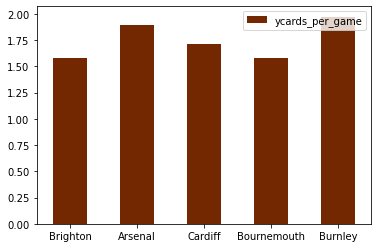

In [101]:
game_df.plot.bar(x=None,y='ycards_per_game',color="#742802",rot=0,figsize=(6,4),grid='None')
plt.grid(False)

In [102]:
import pandas as pd
my_df=pd.read_csv("season-1819_csv.csv")

<BarContainer object of 3 artists>

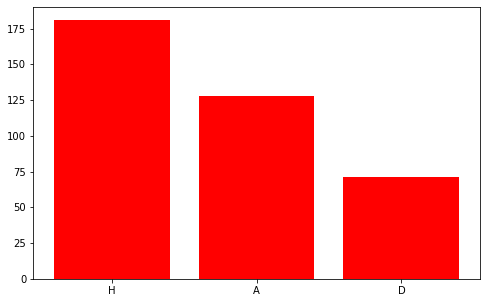

In [103]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(list(my_df['FTR'].value_counts()[0:5].keys()),list(my_df['FTR'].value_counts()[0:5]),color="r")

In [104]:
liverpool_home=my_df[my_df['HomeTeam']=='Liverpool']

Text(0.5, 1.0, 'Goals distribution LFC @18/19 season')

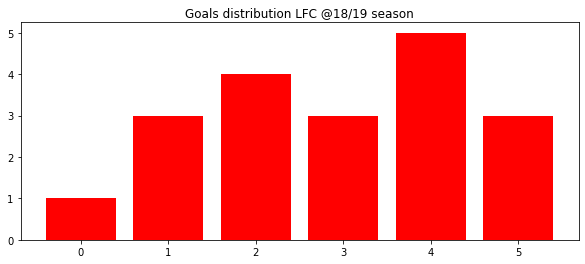

In [105]:
plt.bar(list(liverpool_home['FTHG'].value_counts()[0:10].keys()),list(liverpool_home['FTHG'].value_counts()[0:10]),color="r")
plt.title('Goals distribution LFC @18/19 season')

In [106]:
prac_df=my_df[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HC','AC','HF','AF','HY','AY','HR','AR']]

In [107]:
check1=prac_df[['FTHG']]

In [108]:
from itertools import product
n=3
omega=set(product(['1','2'],repeat=n))

In [109]:
omega

{('1', '1', '1'),
 ('1', '1', '2'),
 ('1', '2', '1'),
 ('1', '2', '2'),
 ('2', '1', '1'),
 ('2', '1', '2'),
 ('2', '2', '1'),
 ('2', '2', '2')}

In [110]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Text(0.5, 1.0, 'Full time home goals density plot')

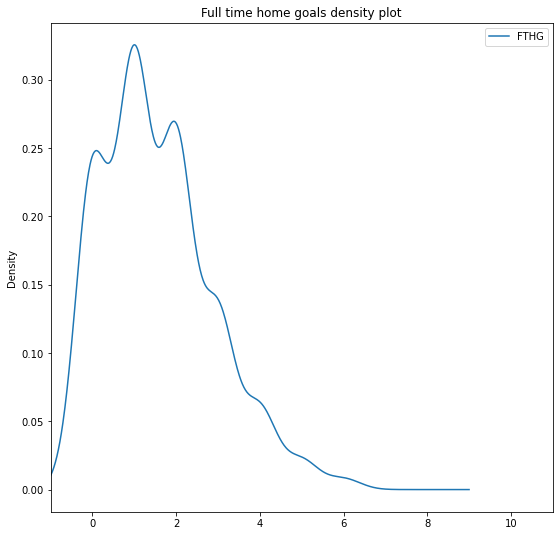

In [111]:
pd.DataFrame(check1).plot(kind="density",figsize=(9,9),xlim=(-1,11))
plt.title('Full time home goals density plot')

## USING CROSS TAB

In [112]:
pd.crosstab(index=prac_df['HF'],
           columns=prac_df['HY'],
           margins=True,
           dropna=True,
           normalize='index')

HY,0,1,2,3,4,5,6
HF,,,,,,,
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.400000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000
5,0.533333,0.333333,0.066667,0.066667,0.000000,0.000000,0.000000
6,0.523810,0.380952,0.095238,0.000000,0.000000,0.000000,0.000000
7,0.411765,0.235294,0.294118,0.029412,0.029412,0.000000,0.000000
8,0.205882,0.411765,0.294118,0.058824,0.029412,0.000000,0.000000
9,0.227273,0.295455,0.295455,0.136364,0.022727,0.022727,0.000000


In [113]:
y2=pd.crosstab(index=prac_df['HF'],
           columns=prac_df['HY'],
           margins=True,
           dropna=True,
           normalize='columns')

In [114]:
pd.crosstab(index=prac_df['FTHG'],
           columns=prac_df['HC'],
           margins=True,
           dropna=True,
           normalize='index')

HC,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16
FTHG,,,,,,,,,,,,,,,,
0,0.034091,0.079545,0.090909,0.125000,0.068182,0.170455,0.136364,0.090909,0.034091,0.034091,0.090909,0.011364,0.022727,0.000000,0.011364,0.000000
1,0.000000,0.025862,0.086207,0.112069,0.155172,0.137931,0.086207,0.103448,0.120690,0.043103,0.068966,0.017241,0.008621,0.017241,0.008621,0.008621
2,0.000000,0.105263,0.084211,0.105263,0.105263,0.094737,0.147368,0.147368,0.084211,0.021053,0.063158,0.021053,0.010526,0.010526,0.000000,0.000000
3,0.000000,0.020833,0.062500,0.062500,0.187500,0.187500,0.104167,0.041667,0.104167,0.062500,0.083333,0.000000,0.062500,0.020833,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.090909,0.181818,0.181818,0.090909,0.045455,0.181818,0.000000,0.227273,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.125000,0.250000,0.125000,0.125000,0.000000,0.000000,0.125000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
All,0.007895,0.055263,0.078947,0.105263,0.131579,0.142105,0.115789,0.097368,0.089474,0.036842,0.086842,0.015789,0.018421,0.010526,0.005263,0.002632


In [115]:
numerical_df=prac_df.select_dtypes(exclude=[object])

In [116]:
numerical_df.shape

(380, 10)

In [117]:
corr_matrix=numerical_df.corr()

In [118]:
corr_matrix

,FTHG,FTAG,HC,AC,HF,AF,HY,AY,HR,AR
FTHG,1.000000,-0.178097,0.086339,-0.134962,-0.062223,-0.060194,-0.111241,-0.051177,-0.058880,0.003761
FTAG,-0.178097,1.000000,-0.135966,0.035167,0.076273,-0.036571,0.145318,0.032021,0.172951,-0.051326
HC,0.086339,-0.135966,1.000000,-0.401601,-0.084623,-0.001472,-0.130006,0.031305,-0.036294,0.053310
AC,-0.134962,0.035167,-0.401601,1.000000,0.016414,-0.075870,0.120482,-0.102037,0.045667,-0.045671
HF,-0.062223,0.076273,-0.084623,0.016414,1.000000,0.100445,0.346874,0.075741,0.027316,0.033643
AF,-0.060194,-0.036571,-0.001472,-0.075870,0.100445,1.000000,0.076947,0.336089,-0.040696,0.060517
HY,-0.111241,0.145318,-0.130006,0.120482,0.346874,0.076947,1.000000,0.134118,-0.035237,0.021427
AY,-0.051177,0.032021,0.031305,-0.102037,0.075741,0.336089,0.134118,1.000000,0.017278,0.009168
HR,-0.058880,0.172951,-0.036294,0.045667,0.027316,-0.040696,-0.035237,0.017278,1.000000,0.028190
AR,0.003761,-0.051326,0.053310,-0.045671,0.033643,0.060517,0.021427,0.009168,0.028190,1.000000


<AxesSubplot:>

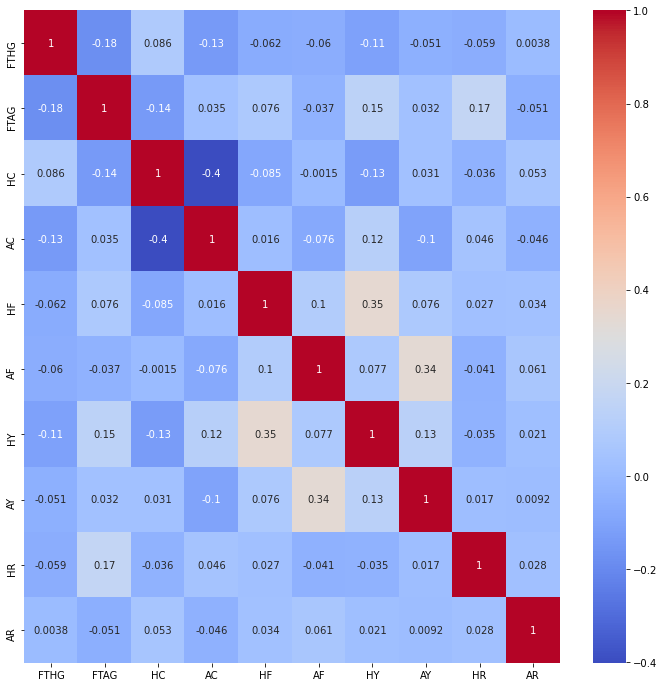

In [119]:
import seaborn
plt.figure(figsize=(12,12))
seaborn.heatmap(numerical_df.corr(),annot=True,cmap="coolwarm")

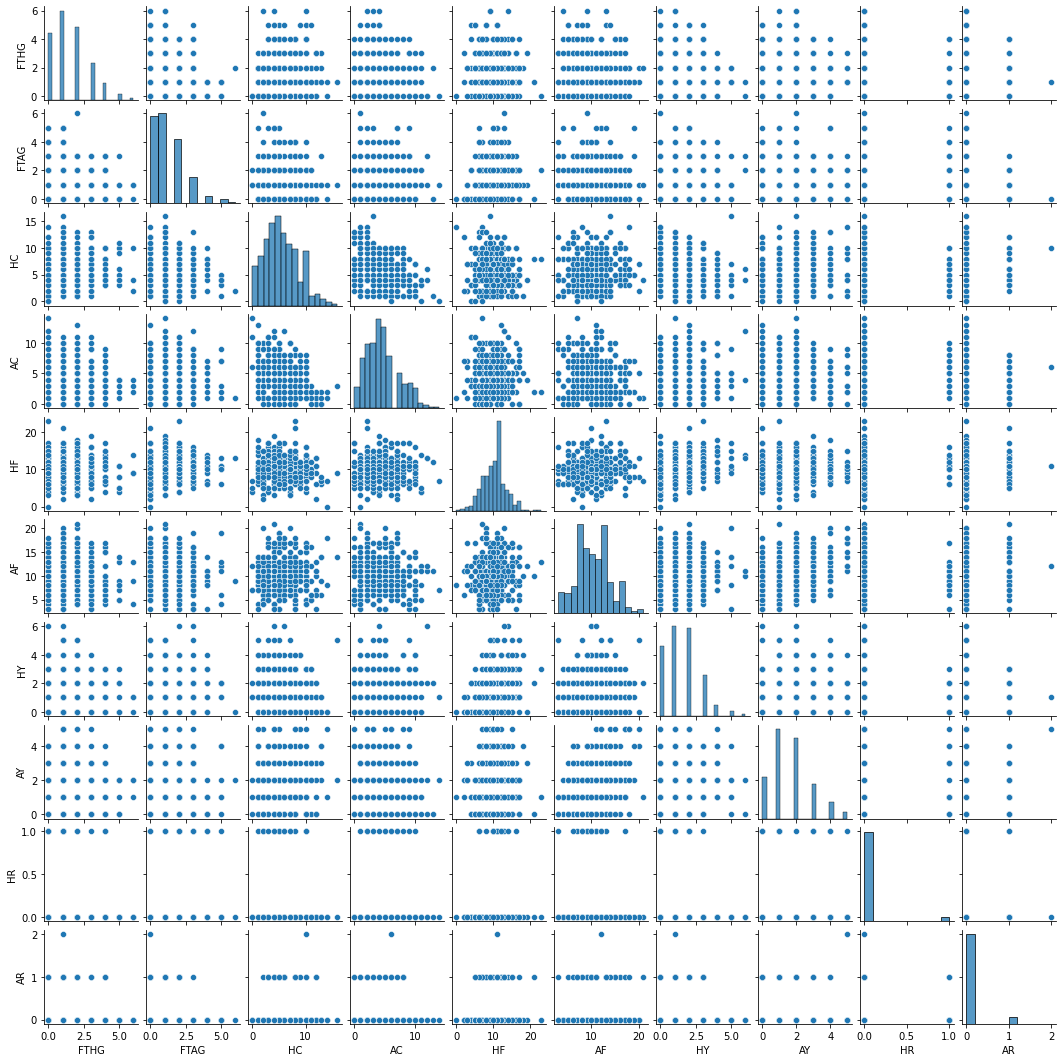

In [120]:
numerical_df_pairplot=numerical_df.dropna()
seaborn.pairplot(numerical_df_pairplot,height=1.5)

In [121]:
afouls=prac_df.groupby('AwayTeam').AF.sum()

In [122]:
pr_df=pd.concat([afouls],axis='columns',sort=False)

In [123]:
pr_df

,AF
AwayTeam,
Arsenal,194
Bournemouth,152
Brighton,242
Burnley,175
Cardiff,189
Chelsea,185
Crystal Palace,206
Everton,214
Fulham,224


In [124]:
pr_df.rename(columns={'AF':'afouls'},inplace=True)

## BINNING

In [125]:
def binfunction(col,cut_points,labels=None):
    minval=col.min()
    maxval=col.max()
    break_points=[minval]+cut_points+[maxval]
    print(break_points)
    if not labels:
        labels=range(len(cut_points)+1)
    colBin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True,duplicates="drop")
    return colBin

In [126]:
cut_points=[210,240]
labels=["Below","Medium","High"]
pr_df["Foul category"]=binfunction(pr_df["afouls"],cut_points,labels)
pr_df

[152, 210, 240, 242]


,afouls,Foul category
AwayTeam,,
Arsenal,194,Below
Bournemouth,152,Below
Brighton,242,High
Burnley,175,Below
Cardiff,189,Below
Chelsea,185,Below
Crystal Palace,206,Below
Everton,214,Medium
Fulham,224,Medium


In [127]:
pr_df['Foul category'].value_counts()

Below     13
Medium     6
High       1
Name: Foul category, dtype: int64

<BarContainer object of 20 artists>

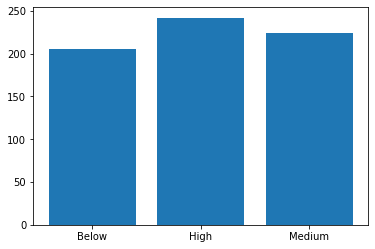

In [128]:
plt.bar(pr_df['Foul category'],pr_df['afouls'])

In [129]:
import numpy as np
pd.crosstab(prac_df.HomeTeam,prac_df.FTHG,values=prac_df.HC,aggfunc=np.average)

FTHG,0,1,2,3,4,5,6
HomeTeam,,,,,,,
Arsenal,2.000000,9.750000,5.625000,5.666667,8.0,9.0,NaN
Bournemouth,3.750000,7.200000,4.857143,4.000000,3.5,NaN,NaN
Brighton,4.800000,4.727273,7.000000,3.500000,NaN,NaN,NaN
Burnley,2.000000,4.800000,4.600000,NaN,3.0,NaN,NaN
Cardiff,4.000000,5.200000,6.166667,NaN,4.0,NaN,NaN
Chelsea,7.000000,8.500000,5.500000,5.500000,5.0,11.0,NaN
Crystal Palace,7.250000,6.000000,8.000000,NaN,NaN,4.0,NaN
Everton,4.666667,6.833333,5.142857,9.000000,10.0,NaN,NaN
Fulham,4.333333,5.666667,7.000000,2.000000,8.0,NaN,NaN


In [130]:
pd.crosstab(prac_df.HomeTeam,prac_df.FTR).head()

FTR,A,D,H
HomeTeam,,,
Arsenal,2,3,14
Bournemouth,6,5,8
Brighton,8,5,6
Burnley,10,2,7
Cardiff,11,2,6


Text(0.5, 1.0, 'Number of Yellow Cards Conceded at Home based on results')

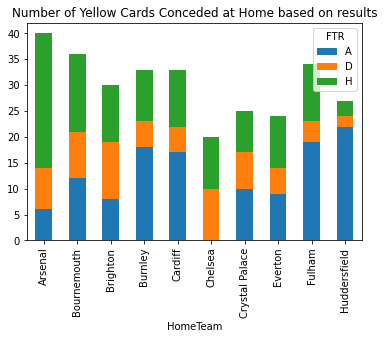

In [131]:
pd.crosstab(prac_df.HomeTeam,prac_df.FTR,values=prac_df.HY,aggfunc=np.sum).head(10).plot(kind='bar',stacked=True)
plt.title('Number of Yellow Cards Conceded at Home based on results')

In [132]:
grp=prac_df.groupby('HomeTeam')

In [133]:
grp

In [134]:
lfc_results=grp.get_group('Liverpool')

In [135]:
#aggregate function
grp.aggregate(np.sum)

,FTHG,FTAG,HC,AC,HF,AF,HY,AY,HR,AR
HomeTeam,,,,,,,,,,
Arsenal,42,16,128,83,218,256,40,38,0,1
Bournemouth,30,25,96,110,187,232,36,44,1,5
Brighton,19,28,90,87,221,167,30,29,2,1
Burnley,24,32,80,104,184,193,33,33,0,2
Cardiff,21,38,95,116,195,232,33,32,0,2
Chelsea,39,12,120,72,154,202,20,29,0,0
Crystal Palace,19,23,130,86,180,211,25,31,1,0
Everton,30,21,119,73,218,226,24,43,0,0
Fulham,22,36,102,95,199,159,34,22,1,0


In [136]:
aggregate_home=grp['FTHG'].agg([np.sum,np.mean,np.std])

In [137]:
Z2=grp.agg({'FTHG':'sum','HC':'mean'})

## Plotting density curves

In [138]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

(array([198., 109.,  51.,  14.,   8.]),
 array([0. , 1.2, 2.4, 3.6, 4.8, 6. ]),
 <BarContainer object of 5 artists>)

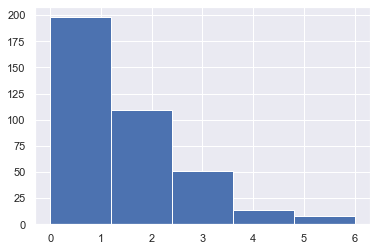

In [139]:
plt.hist(prac_df['HY'],bins=5)

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HF', ylabel='Density'>

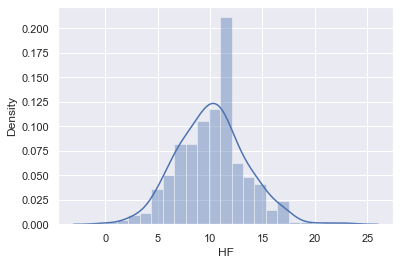

In [140]:
sns.distplot(prac_df["HF"])

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HF'>

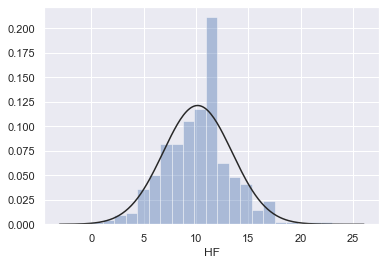

In [141]:
sns.distplot(prac_df["HF"],fit=stats.norm,kde=False)

In [142]:
loc,scale=stats.norm.fit(prac_df["HF"])
loc,scale

(10.152631578947368, 3.289195777734419)

In [143]:
x=np.linspace(start=0,stop=20,num=100)

In [144]:
pdf=stats.norm.pdf(x,loc=loc,scale=scale)

Text(0, 0.5, 'PDF')

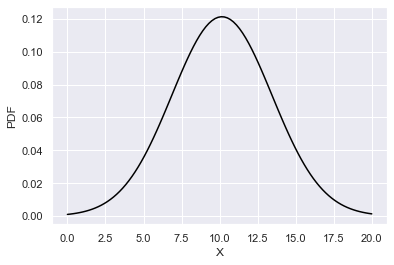

In [145]:
#Normal dist
plt.plot(x,pdf,color='black')
plt.xlabel('X')
plt.ylabel('PDF')

In [146]:
cdf=stats.norm.cdf(x,loc=loc,scale=scale)

Text(0, 0.5, 'CDF=P(x<=X)')

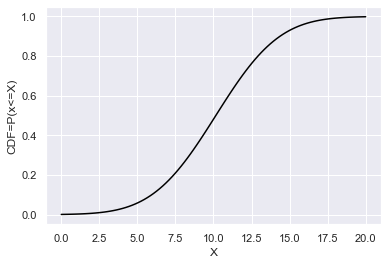

In [147]:
#CDF
plt.plot(x,cdf,color='black')
plt.xlabel('X')
plt.ylabel('CDF=P(x<=X)')

In [148]:
cdf_=np.linspace(start=0,stop=1,num=10000)

In [149]:
x_=stats.norm.ppf(cdf_,loc=loc,scale=scale)

Text(0, 0.5, 'CDF=P(x<=X)')

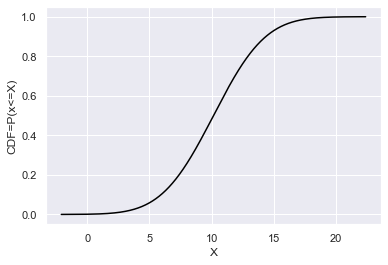

In [150]:
plt.plot(x_,cdf_,color='black')
plt.xlabel('X')
plt.ylabel('CDF=P(x<=X)')

Text(0, 0.5, 'CDF=P(x<=X)')

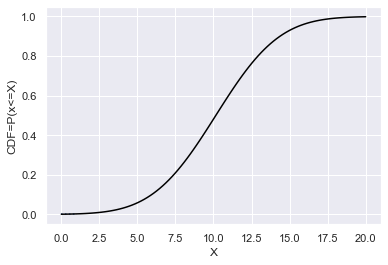

In [151]:
cdf_1=stats.norm.cdf(1,loc=loc,scale=scale)
plt.plot(x,cdf,color='black')
plt.vlines(1,0,cdf_1,linestyle=':')
plt.hlines(cdf_1,0,1,linestyle=":")
plt.xlabel('X')
plt.ylabel('CDF=P(x<=X)')

In [152]:
x_99=stats.norm.ppf(0.99,loc=loc,scale=scale)
x_99

17.804445183783944

Text(0, 0.5, 'CDF=P(x<=X)')

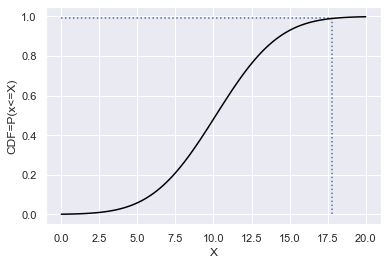

In [153]:
plt.plot(x,cdf,color='black')
plt.vlines(x_99,0,.99,linestyle=':')
plt.hlines(0.99,0,x_99,linestyle=":")
plt.xlabel('X')
plt.ylabel('CDF=P(x<=X)')

In [154]:
u=pd.crosstab(prac_df.HomeTeam,prac_df.FTHG,values=prac_df.HC,aggfunc=np.average)
u.isnull().sum()/u.shape[0]

FTHG
0    0.05
1    0.00
2    0.05
3    0.20
4    0.35
5    0.70
6    0.95
dtype: float64

In [155]:
hh=prac_df.loc[:,['HY','HF','HR']].sum()
hh

HY     580
HF    3858
HR      18
dtype: int64

In [156]:
hh_p=prac_df['HY'].sum()/prac_df['HF'].sum()*100
hh_p

15.033696215655782

In [157]:
h_r=prac_df['HR'].sum()/prac_df['HY'].sum()*100
h_r

3.103448275862069

In [158]:
prac_df.loc[:,['HomeTeam','HY','FTAG']].\
groupby(['HomeTeam','HY']).count()[:10]

FTAG
HomeTeam    HY      
Arsenal     0      3
            1      2
            2      9
            3      2
            4      1
            5      2
Bournemouth 0      2
            1      7
            2      4
            3      3

In [159]:
FTHG_HC=prac_df.loc[:,['HomeTeam','FTHG','HC']]
pd.pivot_table(FTHG_HC,
index=['HomeTeam','FTHG'],values='HC',aggfunc='mean')[:10]

HC
HomeTeam    FTHG          
Arsenal     0     2.000000
            1     9.750000
            2     5.625000
            3     5.666667
            4     8.000000
            5     9.000000
Bournemouth 0     3.750000
            1     7.200000
            2     4.857143
            3     4.000000

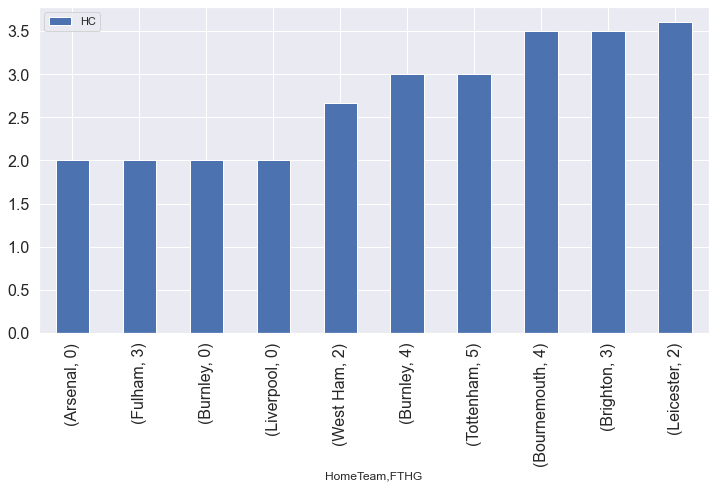

In [160]:
agg_=pd.pivot_table(FTHG_HC,
index=['HomeTeam','FTHG'],values='HC',aggfunc='mean').\
sort_values('HC',ascending='False')[:10].\
plot(kind='bar',figsize=(12,6),fontsize=16,rot=90)

# Linear Regression

> Here the predicted/dependent variable is FTHG (Full time home goals)
* The rest of the variables are predictors 

In [161]:
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [162]:
Z2=grp.agg({'FTHG':'sum','HC':'mean'},inplace=True)

In [163]:
agg=Z2['HC'].mean()
Z2['RSS1']=(Z2['HC']-agg)**2

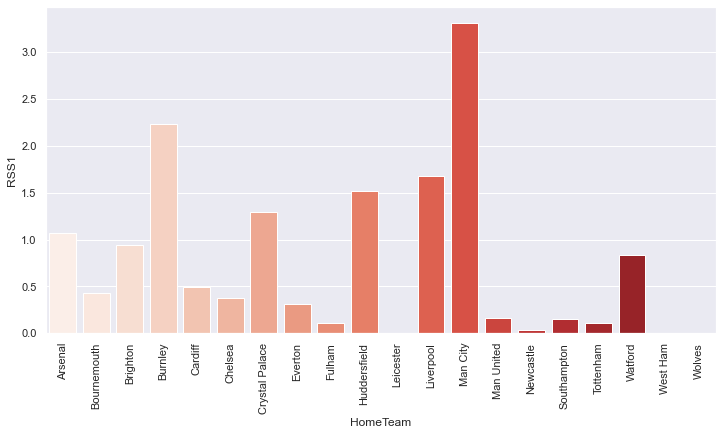

In [164]:
plt.figure(figsize=(12,6))
plots1 = sns.barplot(x=Z2.index, y=Z2['RSS1'],data=Z2,palette='Reds')
plt.xticks(rotation=90)
plt.show()

In [165]:
from sklearn import linear_model

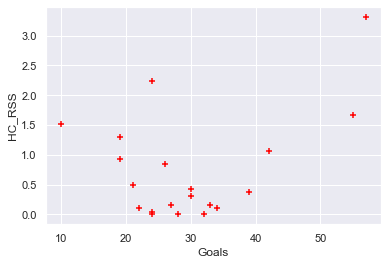

In [166]:
%matplotlib inline
plt.xlabel('Goals')
plt.ylabel('HC_RSS')
plt.scatter(Z2.FTHG,Z2.RSS1,color='red',marker="+")

In [167]:
#predicting home goals scored by team
reg=linear_model.LinearRegression()
reg.fit(Z2[['HC']],Z2.FTHG)

LinearRegression()

In [168]:
# total no of goals to be scored by a team which gets 4 corners in total
reg.predict([[4]])

array([13.52133608])

In [169]:
reg.coef_

array([9.54613008])

In [170]:
reg.intercept_

-24.66318422601532

In [171]:
# 2 corners overall, likely to concede 5 goals
reg.predict([[2]])

array([-5.57092407])

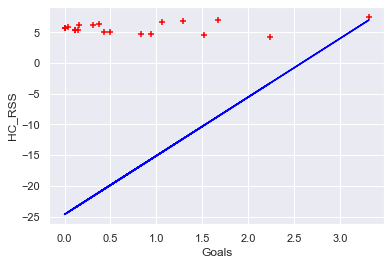

In [172]:
%matplotlib inline
plt.xlabel('Goals')
plt.ylabel('HC_RSS')
plt.scatter(Z2.RSS1,Z2.HC,color='red',marker="+")
plt.plot(Z2.RSS1,reg.predict(Z2[['RSS1']]),color='blue')

In [173]:
z3=grp.agg({'FTHG':'sum','HC':'sum'}).head(5)

In [174]:
z3

,FTHG,HC
HomeTeam,,
Arsenal,42,128
Bournemouth,30,96
Brighton,19,90
Burnley,24,80
Cardiff,21,95


In [175]:
agg1=z3['HC'].mean()
z3['RSS2']=(z3['HC']-agg)**2
z3

,FTHG,HC,RSS2
HomeTeam,,,
Arsenal,42,128,14956.002659
Bournemouth,30,96,8153.139501
Brighton,19,90,7105.602659
Burnley,24,80,5519.707922
Cardiff,21,95,7973.550028


C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HC', ylabel='Density'>

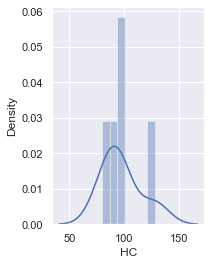

In [176]:
plt.subplot(1,2,1)
sns.distplot(z3.HC)

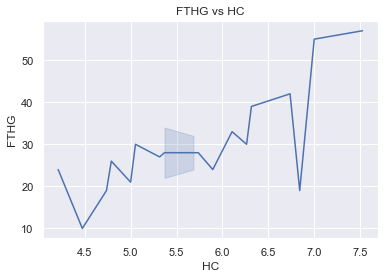

In [177]:
sns.lineplot(y='FTHG',x='HC',data=Z2)
plt.title('FTHG vs HC')
plt.show()

In [178]:
a_df=grp.aggregate(np.sum)

In [179]:
reg=linear_model.LinearRegression()
reg.fit(a_df[['HC','AF']],a_df.FTHG)

LinearRegression()

In [180]:
reg.coef_

array([ 0.50378987, -0.04916842])

In [181]:
reg.intercept_

-15.183644670216704

In [182]:
#prediction of number of colums when home corners are 100 and away team's fouls are 100
reg.predict([[100,100]])

array([30.27850002])

In [183]:
a1_df=grp.aggregate(np.mean)

In [184]:
reg=linear_model.LinearRegression()
reg.fit(a1_df[['HF','AC']],a1_df.FTAG)

LinearRegression()

In [185]:
reg.predict([[4,7]])

array([1.32141204])

In [186]:
x1=a_df.drop(['FTHG','FTAG','HR','AR'],axis=1).values
y1=a_df['FTHG'].values

In [187]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x1,y1)

LinearRegression()

In [188]:
y2=ml.predict(x1)
y2

array([37.59878225, 26.71628156, 17.82517995, 21.14690696, 19.12158236,
       40.782     , 36.77054858, 29.34605128, 25.65461362, 21.25045355,
       33.98267229, 46.0698127 , 53.69179814, 29.21625914, 22.96681451,
       22.42669522, 28.32596832, 19.95328139, 31.84900266, 31.3052955 ])

In [189]:
ml.predict([[150,60,150,180,30,35]])

array([60.98662976])

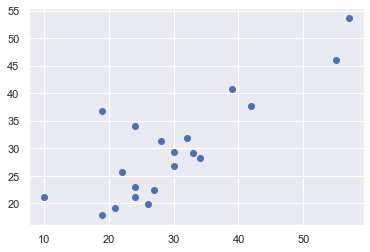

In [190]:
plt.scatter(y1,y2)

## LOGISTIC REGRESSION

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
model1=LogisticRegression()

In [193]:
model1.fit(x1,y1)

C:\Users\sanyalam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
model1.score(x1,y1)

1.0

In [195]:
# binning
pr_df

,afouls,Foul category
AwayTeam,,
Arsenal,194,Below
Bournemouth,152,Below
Brighton,242,High
Burnley,175,Below
Cardiff,189,Below
Chelsea,185,Below
Crystal Palace,206,Below
Everton,214,Medium
Fulham,224,Medium


In [196]:
pr_df.rename(columns={'Foul category':'category'},inplace=True)

In [197]:
dum1=pd.get_dummies(pr_df.category)

In [198]:
AY=prac_df.groupby('AwayTeam').AY.sum()

In [199]:
merge=pd.concat([pr_df,dum1,AY],axis='columns')

In [200]:
merge

,afouls,category,Below,Medium,High,AY
AwayTeam,,,,,,
Arsenal,194,Below,1,0,0,32
Bournemouth,152,Below,1,0,0,24
Brighton,242,High,0,0,1,30
Burnley,175,Below,1,0,0,42
Cardiff,189,Below,1,0,0,32
Chelsea,185,Below,1,0,0,29
Crystal Palace,206,Below,1,0,0,33
Everton,214,Medium,0,1,0,31
Fulham,224,Medium,0,1,0,34


In [201]:
fina_df=merge.drop(['Below'],axis='columns')

In [202]:
fina_df.reset_index(drop=True,inplace=True)

In [203]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [204]:
X=fina_df.drop(['category','afouls'],axis='columns')
X

,Medium,High,AY
0,0,0,32
1,0,0,24
2,0,1,30
3,0,0,42
4,0,0,32
5,0,0,29
6,0,0,33
7,1,0,31
8,1,0,34
9,0,0,28


In [205]:
y=fina_df.afouls

In [206]:
model2.fit(X,y)

LinearRegression()

In [207]:
model2.predict([[0,1,40]])

array([254.11235955])

In [208]:
#model score
model2.score(X,y)

0.682386309745002

In [209]:
new_merge=pd.concat([a_df,python_df1],axis='columns')

In [210]:
new_merge.drop(['AF'],axis='columns',inplace=True)

In [211]:
new_merge

,FTHG,FTAG,HC,AC,HF,HY,AY,HR,AR,H_S,HS_T,P_C
HomeTeam,,,,,,,,,,,,
Arsenal,42,16,128,83,218,40,38,0,1,256,96,37.500000
Bournemouth,30,25,96,110,187,36,44,1,5,229,82,35.807860
Brighton,19,28,90,87,221,30,29,2,1,200,53,26.500000
Burnley,24,32,80,104,184,33,33,0,2,210,66,31.428571
Cardiff,21,38,95,116,195,33,32,0,2,230,68,29.565217
Chelsea,39,12,120,72,154,20,29,0,0,325,118,36.307692
Crystal Palace,19,23,130,86,180,25,31,1,0,294,76,25.850340
Everton,30,21,119,73,218,24,43,0,0,279,85,30.465950
Fulham,22,36,102,95,199,34,22,1,0,274,86,31.386861


In [212]:
new_merge['HS_C']=(new_merge['HC']+new_merge['H_S'])
new_merge

,FTHG,FTAG,HC,AC,HF,HY,AY,HR,AR,H_S,HS_T,P_C,HS_C
HomeTeam,,,,,,,,,,,,,
Arsenal,42,16,128,83,218,40,38,0,1,256,96,37.500000,384
Bournemouth,30,25,96,110,187,36,44,1,5,229,82,35.807860,325
Brighton,19,28,90,87,221,30,29,2,1,200,53,26.500000,290
Burnley,24,32,80,104,184,33,33,0,2,210,66,31.428571,290
Cardiff,21,38,95,116,195,33,32,0,2,230,68,29.565217,325
Chelsea,39,12,120,72,154,20,29,0,0,325,118,36.307692,445
Crystal Palace,19,23,130,86,180,25,31,1,0,294,76,25.850340,424
Everton,30,21,119,73,218,24,43,0,0,279,85,30.465950,398
Fulham,22,36,102,95,199,34,22,1,0,274,86,31.386861,376


In [213]:
cut_points=[300,350,450]
labels=["Below Average","Average","Above average","Good"]
new_merge["Combined_category"]=binfunction(new_merge["HS_C"],cut_points,labels)
new_merge

[288, 300, 350, 450, 529]


,FTHG,FTAG,HC,AC,HF,HY,AY,HR,AR,H_S,HS_T,P_C,HS_C,Combined_category
HomeTeam,,,,,,,,,,,,,,
Arsenal,42,16,128,83,218,40,38,0,1,256,96,37.500000,384,Above average
Bournemouth,30,25,96,110,187,36,44,1,5,229,82,35.807860,325,Average
Brighton,19,28,90,87,221,30,29,2,1,200,53,26.500000,290,Below Average
Burnley,24,32,80,104,184,33,33,0,2,210,66,31.428571,290,Below Average
Cardiff,21,38,95,116,195,33,32,0,2,230,68,29.565217,325,Average
Chelsea,39,12,120,72,154,20,29,0,0,325,118,36.307692,445,Above average
Crystal Palace,19,23,130,86,180,25,31,1,0,294,76,25.850340,424,Above average
Everton,30,21,119,73,218,24,43,0,0,279,85,30.465950,398,Above average
Fulham,22,36,102,95,199,34,22,1,0,274,86,31.386861,376,Above average


In [214]:
new_merge['Combined_category'].value_counts()

Above average    12
Average           3
Below Average     3
Good              2
Name: Combined_category, dtype: int64

In [215]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [216]:
dfle=new_merge
dfle.Combined_category=le.fit_transform(dfle.Combined_category)
dfle

,FTHG,FTAG,HC,AC,HF,HY,AY,HR,AR,H_S,HS_T,P_C,HS_C,Combined_category
HomeTeam,,,,,,,,,,,,,,
Arsenal,42,16,128,83,218,40,38,0,1,256,96,37.500000,384,0
Bournemouth,30,25,96,110,187,36,44,1,5,229,82,35.807860,325,1
Brighton,19,28,90,87,221,30,29,2,1,200,53,26.500000,290,2
Burnley,24,32,80,104,184,33,33,0,2,210,66,31.428571,290,2
Cardiff,21,38,95,116,195,33,32,0,2,230,68,29.565217,325,1
Chelsea,39,12,120,72,154,20,29,0,0,325,118,36.307692,445,0
Crystal Palace,19,23,130,86,180,25,31,1,0,294,76,25.850340,424,0
Everton,30,21,119,73,218,24,43,0,0,279,85,30.465950,398,0
Fulham,22,36,102,95,199,34,22,1,0,274,86,31.386861,376,0


# COMPOSITE SCORING

In [217]:
numerics=['int16','int32','int64','float16','float32','float64']
new_merge1=new_merge.select_dtypes(numerics).columns

In [218]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale=StandardScaler()
max_scale=MinMaxScaler()

In [219]:
new_merge2=new_merge.copy()

In [220]:
new_merge2[new_merge1]=scale.fit_transform(new_merge2[new_merge1])

In [221]:
new_merge2

,FTHG,FTAG,HC,AC,HF,HY,AY,HR,AR,H_S,HS_T,P_C,HS_C,Combined_category
HomeTeam,,,,,,,,,,,,,,
Arsenal,1.084455,-1.015818,1.188774,-0.196657,1.099134,1.501086,1.030508,-0.904534,-0.307076,-0.270230,0.221055,0.904170,0.115604,-0.719195
Bournemouth,0.017778,0.156280,-0.752082,1.320412,-0.258362,0.955236,2.061016,0.100504,2.422489,-0.851602,-0.374092,0.522142,-0.851863,0.239732
Brighton,-0.960009,0.546979,-1.115992,0.028094,1.230505,0.136462,-0.515254,1.105542,-0.307076,-1.476039,-1.606897,-1.579264,-1.425784,1.198658
Burnley,-0.515561,1.067911,-1.722510,0.983286,-0.389733,0.545849,0.171751,-0.904534,0.375315,-1.260716,-1.054260,-0.466556,-1.425784,1.198658
Cardiff,-0.782230,1.849310,-0.812733,1.657539,0.091959,0.545849,0.000000,-0.904534,0.375315,-0.830070,-0.969239,-0.887240,-0.851863,0.239732
Chelsea,0.817786,-1.536750,0.703560,-0.814722,-1.703439,-1.228161,-0.515254,-0.904534,-0.989467,1.215498,1.156285,0.634987,1.115867,-0.719195
Crystal Palace,-0.960009,-0.104186,1.310078,-0.028094,-0.564894,-0.545849,-0.171751,0.100504,-0.989467,0.547997,-0.629155,-1.725936,0.771514,-0.719195
Everton,0.017778,-0.364653,0.642909,-0.758535,1.099134,-0.682312,1.889265,-0.904534,-0.989467,0.225012,-0.246561,-0.683884,0.345173,-0.719195
Fulham,-0.693340,1.588843,-0.388171,0.477596,0.267120,0.682312,-1.717513,0.100504,-0.989467,0.117351,-0.204050,-0.475973,-0.015578,-0.719195


In [222]:
new_merge2['Composite']=new_merge2.sum(axis=1)
new_merge2

,FTHG,FTAG,HC,AC,HF,HY,AY,HR,AR,H_S,HS_T,P_C,HS_C,Combined_category,Composite
HomeTeam,,,,,,,,,,,,,,,
Arsenal,1.084455,-1.015818,1.188774,-0.196657,1.099134,1.501086,1.030508,-0.904534,-0.307076,-0.270230,0.221055,0.904170,0.115604,-0.719195,3.731276
Bournemouth,0.017778,0.156280,-0.752082,1.320412,-0.258362,0.955236,2.061016,0.100504,2.422489,-0.851602,-0.374092,0.522142,-0.851863,0.239732,4.707587
Brighton,-0.960009,0.546979,-1.115992,0.028094,1.230505,0.136462,-0.515254,1.105542,-0.307076,-1.476039,-1.606897,-1.579264,-1.425784,1.198658,-4.740075
Burnley,-0.515561,1.067911,-1.722510,0.983286,-0.389733,0.545849,0.171751,-0.904534,0.375315,-1.260716,-1.054260,-0.466556,-1.425784,1.198658,-3.396882
Cardiff,-0.782230,1.849310,-0.812733,1.657539,0.091959,0.545849,0.000000,-0.904534,0.375315,-0.830070,-0.969239,-0.887240,-0.851863,0.239732,-1.278205
Chelsea,0.817786,-1.536750,0.703560,-0.814722,-1.703439,-1.228161,-0.515254,-0.904534,-0.989467,1.215498,1.156285,0.634987,1.115867,-0.719195,-2.767540
Crystal Palace,-0.960009,-0.104186,1.310078,-0.028094,-0.564894,-0.545849,-0.171751,0.100504,-0.989467,0.547997,-0.629155,-1.725936,0.771514,-0.719195,-3.708445
Everton,0.017778,-0.364653,0.642909,-0.758535,1.099134,-0.682312,1.889265,-0.904534,-0.989467,0.225012,-0.246561,-0.683884,0.345173,-0.719195,-1.129870
Fulham,-0.693340,1.588843,-0.388171,0.477596,0.267120,0.682312,-1.717513,0.100504,-0.989467,0.117351,-0.204050,-0.475973,-0.015578,-0.719195,-1.969562


In [223]:
new_merge2['Composite']=max_scale.fit_transform(new_merge2[['Composite']])

In [224]:
new_merge2

,FTHG,FTAG,HC,AC,HF,HY,AY,HR,AR,H_S,HS_T,P_C,HS_C,Combined_category,Composite
HomeTeam,,,,,,,,,,,,,,,
Arsenal,1.084455,-1.015818,1.188774,-0.196657,1.099134,1.501086,1.030508,-0.904534,-0.307076,-0.270230,0.221055,0.904170,0.115604,-0.719195,0.755651
Bournemouth,0.017778,0.156280,-0.752082,1.320412,-0.258362,0.955236,2.061016,0.100504,2.422489,-0.851602,-0.374092,0.522142,-0.851863,0.239732,0.842738
Brighton,-0.960009,0.546979,-1.115992,0.028094,1.230505,0.136462,-0.515254,1.105542,-0.307076,-1.476039,-1.606897,-1.579264,-1.425784,1.198658,0.000000
Burnley,-0.515561,1.067911,-1.722510,0.983286,-0.389733,0.545849,0.171751,-0.904534,0.375315,-1.260716,-1.054260,-0.466556,-1.425784,1.198658,0.119814
Cardiff,-0.782230,1.849310,-0.812733,1.657539,0.091959,0.545849,0.000000,-0.904534,0.375315,-0.830070,-0.969239,-0.887240,-0.851863,0.239732,0.308801
Chelsea,0.817786,-1.536750,0.703560,-0.814722,-1.703439,-1.228161,-0.515254,-0.904534,-0.989467,1.215498,1.156285,0.634987,1.115867,-0.719195,0.175952
Crystal Palace,-0.960009,-0.104186,1.310078,-0.028094,-0.564894,-0.545849,-0.171751,0.100504,-0.989467,0.547997,-0.629155,-1.725936,0.771514,-0.719195,0.092022
Everton,0.017778,-0.364653,0.642909,-0.758535,1.099134,-0.682312,1.889265,-0.904534,-0.989467,0.225012,-0.246561,-0.683884,0.345173,-0.719195,0.322033
Fulham,-0.693340,1.588843,-0.388171,0.477596,0.267120,0.682312,-1.717513,0.100504,-0.989467,0.117351,-0.204050,-0.475973,-0.015578,-0.719195,0.247132


In [225]:
new_merge2['Comp_Score']=pd.qcut(new_merge2['Composite'],3,labels=['C','B','A'])

In [226]:
new_merge2.sort_values(by='Composite',ascending=False)

,FTHG,FTAG,HC,AC,HF,HY,AY,HR,AR,H_S,HS_T,P_C,HS_C,Combined_category,Composite,Comp_Score
HomeTeam,,,,,,,,,,,,,,,,
Man City,2.417802,-1.536750,2.098550,-2.668918,-1.353117,-1.637548,-0.343503,-0.904534,-0.307076,2.528968,2.431600,1.094259,2.493277,2.157585,1.000000,A
Man United,0.284447,0.156280,0.460953,-0.028094,0.880183,0.409387,0.171751,0.100504,-0.307076,0.332674,1.496369,2.454330,0.377968,-0.719195,0.964310,A
Bournemouth,0.017778,0.156280,-0.752082,1.320412,-0.258362,0.955236,2.061016,0.100504,2.422489,-0.851602,-0.374092,0.522142,-0.851863,0.239732,0.842738,A
Arsenal,1.084455,-1.015818,1.188774,-0.196657,1.099134,1.501086,1.030508,-0.904534,-0.307076,-0.270230,0.221055,0.904170,0.115604,-0.719195,0.755651,A
Southampton,-0.248891,0.807445,-0.448823,1.039473,1.142924,1.364624,0.343503,1.105542,-0.307076,-0.227166,-0.076519,0.225995,-0.294340,-0.719195,0.753530,A
Leicester,-0.515561,-0.494886,-0.024261,-0.084282,-0.389733,0.545849,-0.687005,1.105542,2.422489,0.634126,0.348586,-0.061778,0.476355,-0.719195,0.650837,A
Watford,-0.337781,0.546979,-1.055340,0.309033,1.230505,1.228161,-1.889265,2.110579,1.057706,-0.959264,-0.331582,0.803382,-1.015840,0.239732,0.595600,A
Liverpool,2.240022,-1.797216,1.492033,-1.713727,-1.922390,-2.183398,-0.858757,0.100504,-0.989467,1.430821,1.496369,0.929443,1.493015,2.157585,0.590055,B
Wolves,-0.160002,-0.364653,0.036391,0.196657,0.223330,0.545849,1.030508,-0.904534,0.375315,-0.033375,-0.246561,-0.374752,-0.015578,-0.719195,0.386193,B


<AxesSubplot:ylabel='Comp_Score'>

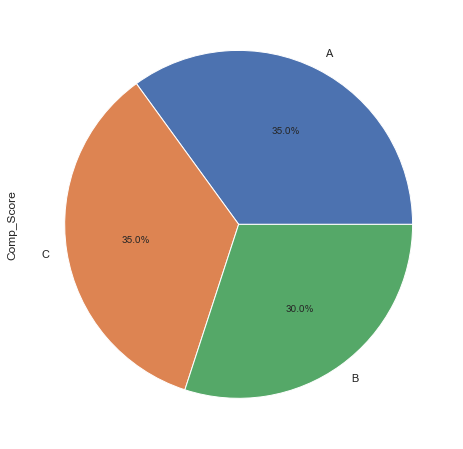

In [227]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
new_merge2['Comp_Score'].value_counts().plot.pie(autopct='%.1f%%')

In [228]:
X=dfle[['HS_T','HS_C','Combined_category']].values

In [229]:
Y=dfle.FTHG
Y.reset_index(drop=True,inplace=True)

In [230]:
max_r=int(np.ceil(max(new_merge['HS_C'])))
min_r=int(np.floor(min(new_merge['HS_C'])))
range1=max_r-min_r
bins=8
bin_width=int(np.round(range1/bins))

In [231]:
intervals=[hsc for hsc in range(min_r,max_r+bin_width,bin_width)]
intervals

[288, 318, 348, 378, 408, 438, 468, 498, 528, 558]

In [232]:
binlabels=["bin"+str(i) for i in range(1,int(len(intervals)))]
binlabels

['bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9']

In [233]:
new_merge["HS_C1"]=pd.cut(new_merge["HS_C"],bins=intervals,labels=binlabels,include_lowest=True )

In [234]:
new_merge['HS_C1']

HomeTeam
Arsenal           bin4
Bournemouth       bin2
Brighton          bin1
Burnley           bin1
Cardiff           bin2
Chelsea           bin6
Crystal Palace    bin5
Everton           bin4
Fulham            bin3
Huddersfield      bin1
Leicester         bin4
Liverpool         bin6
Man City          bin9
Man United        bin4
Newcastle         bin3
Southampton       bin3
Tottenham         bin5
Watford           bin1
West Ham          bin3
Wolves            bin3
Name: HS_C1, dtype: category
Categories (9, object): ['bin1' < 'bin2' < 'bin3' < 'bin4' ... 'bin6' < 'bin7' < 'bin8' < 'bin9']

<AxesSubplot:xlabel='HS_C1'>

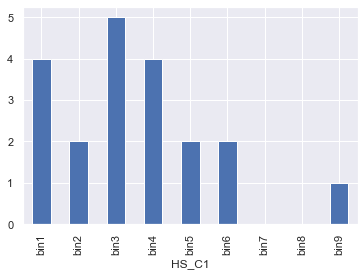

In [235]:
new_merge.groupby('HS_C1')['HS_C'].count().plot.bar()

In [236]:
pd.crosstab(index=prac_df['HF'],
           columns=prac_df['HY'],
           margins=True,normalize='columns')

HY,0,1,2,3,4,5,6,All
HF,,,,,,,,
0,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.002632
2,0.011494,0.009009,0.000000,0.000000,0.000000,0.000000,0.0,0.005263
3,0.034483,0.009009,0.000000,0.000000,0.000000,0.000000,0.0,0.010526
4,0.022989,0.000000,0.027523,0.000000,0.000000,0.000000,0.0,0.013158
5,0.091954,0.045045,0.009174,0.019608,0.000000,0.000000,0.0,0.039474
6,0.126437,0.072072,0.018349,0.000000,0.000000,0.000000,0.0,0.055263
7,0.160920,0.072072,0.091743,0.019608,0.071429,0.000000,0.0,0.089474
8,0.080460,0.126126,0.091743,0.039216,0.071429,0.000000,0.0,0.089474
9,0.114943,0.117117,0.119266,0.117647,0.071429,0.166667,0.0,0.115789


In [237]:
inputs=dfle.drop(['Combined_category','HS_C1','HS_C','P_C','FTAG','AC','HY','AY','HR','AR','HF'],axis='columns')

In [238]:
target=dfle['Combined_category']

In [239]:
from sklearn import tree

In [240]:
model=tree.DecisionTreeClassifier()

In [241]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [242]:
model.score(inputs,target)

1.0

In [243]:
model.predict([[35,100,150,140]])

array([0])

## FIFA DATASET

In [244]:
#FIFA DATASET

In [245]:
fifa=pd.read_csv('data.csv')

fifa.sample(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4929,4929,173614,J. Pearce,30,https://cdn.sofifa.org/players/4/19/173614.png,England,https://cdn.sofifa.org/flags/14.png,70,70,Charlton Athletic,...,58.0,70.0,70.0,69.0,7.0,6.0,7.0,7.0,8.0,€2.3M
4791,4791,206601,M. Sampirisi,25,https://cdn.sofifa.org/players/4/19/206601.png,Italy,https://cdn.sofifa.org/flags/27.png,70,73,Crotone,...,63.0,68.0,75.0,72.0,8.0,8.0,12.0,6.0,6.0,€3.1M
6800,6800,215598,S. Tarashaj,23,https://cdn.sofifa.org/players/4/19/215598.png,Switzerland,https://cdn.sofifa.org/flags/47.png,68,74,Grasshopper Club Zürich,...,62.0,30.0,21.0,12.0,9.0,15.0,11.0,7.0,13.0,NaN
2725,2725,241461,Ferrán Torres,18,https://cdn.sofifa.org/players/4/19/241461.png,Spain,https://cdn.sofifa.org/flags/45.png,73,86,Valencia CF,...,64.0,34.0,24.0,28.0,12.0,9.0,11.0,15.0,12.0,€19.1M
4073,4073,235554,I. Sacko,20,https://cdn.sofifa.org/players/4/19/235554.png,France,https://cdn.sofifa.org/flags/18.png,71,81,OGC Nice,...,68.0,30.0,46.0,39.0,8.0,8.0,7.0,12.0,14.0,€8.2M


In [246]:
def footballclub(x):
    return fifa[fifa['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

footballclub('Liverpool')

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
26,M. Salah,10.0,RM,88,Egypt,26,€255K,€69.5M,2023
58,S. Mané,10.0,LM,86,Senegal,26,€195K,€52M,2023
59,V. van Dijk,4.0,LCB,86,Netherlands,26,€165K,€44.5M,2023
61,Roberto Firmino,9.0,CAM,86,Brazil,26,€195K,€53M,2023
81,Alisson,13.0,GK,85,Brazil,25,€115K,€36.5M,2024
118,Fabinho,3.0,CDM,84,Brazil,24,€120K,€34M,2023
161,N. Keïta,8.0,CM,83,Guinea,23,€120K,€34M,2023
241,A. Robertson,3.0,LB,82,Scotland,24,€98K,€24.5M,2021
296,J. Henderson,8.0,RCM,82,England,28,€125K,€18M,2020
302,G. Wijnaldum,8.0,CAM,82,Netherlands,27,€130K,€23M,2021


In [247]:
fifa['ShortPassing'].fillna(fifa['ShortPassing'].mean(), inplace = True)
fifa['Volleys'].fillna(fifa['Volleys'].mean(), inplace = True)
fifa['Dribbling'].fillna(fifa['Dribbling'].mean(), inplace = True)
fifa['Curve'].fillna(fifa['Curve'].mean(), inplace = True)
fifa['FKAccuracy'].fillna(fifa['FKAccuracy'], inplace = True)
fifa['LongPassing'].fillna(fifa['LongPassing'].mean(), inplace = True)
fifa['BallControl'].fillna(fifa['BallControl'].mean(), inplace = True)
fifa['HeadingAccuracy'].fillna(fifa['HeadingAccuracy'].mean(), inplace = True)
fifa['Finishing'].fillna(fifa['Finishing'].mean(), inplace = True)
fifa['Crossing'].fillna(fifa['Crossing'].mean(), inplace = True)
fifa['Weight'].fillna('200lbs', inplace = True)
fifa['Contract Valid Until'].fillna(2019, inplace = True)
fifa['Height'].fillna("5'11", inplace = True)
fifa['Loaned From'].fillna('None', inplace = True)
fifa['Joined'].fillna('Jul 1, 2018', inplace = True)
fifa['Jersey Number'].fillna(8, inplace = True)
fifa['Body Type'].fillna('Normal', inplace = True)
fifa['Position'].fillna('ST', inplace = True)
fifa['Club'].fillna('No Club', inplace = True)
fifa['Work Rate'].fillna('Medium/ Medium', inplace = True)
fifa['Skill Moves'].fillna(fifa['Skill Moves'].median(), inplace = True)
fifa['Weak Foot'].fillna(3, inplace = True)
fifa['Preferred Foot'].fillna('Right', inplace = True)
fifa['International Reputation'].fillna(1, inplace = True)
fifa['Wage'].fillna('€200K', inplace = True)


In [248]:
def defending(fifa):
    return int(round((fifa[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(fifa):
    return int(round((fifa[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(fifa):
    return int(round((fifa[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(fifa):
    return int(round((fifa[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(fifa):
    return int(round((fifa[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(fifa):
    return int(round((fifa[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(fifa):
    return int(round((fifa[['Potential', 'Overall']].mean()).mean()))

def shooting(fifa):
    return int(round((fifa[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))


In [249]:
fifa.iloc[fifa.groupby(fifa['Position'])['Overall'].idxmax()][['Position', 'Name',
                                                               'Age', 'Club', 'Nationality']].style.background_gradient('Blues')

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


In [250]:
fifa.iloc[fifa.groupby(fifa['Position'])['Potential'].idxmax()][['Position', 'Name',
                                                                 'Age', 'Club', 'Nationality']].style.background_gradient('Reds')

,Position,Name,Age,Club,Nationality
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,FC Barcelona,France
27,CDM,Casemiro,26,Real Madrid,Brazil
350,CF,A. Milik,24,Napoli,Poland
78,CM,S. Milinković-Savić,23,Lazio,Serbia
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
77,LCB,M. Škriniar,23,Inter,Slovakia
11,LCM,T. Kroos,28,Real Madrid,Germany


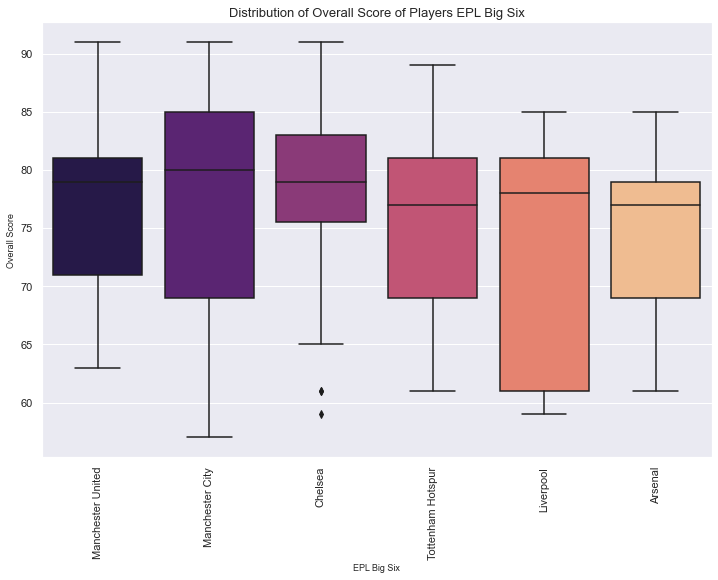

In [251]:
some_clubs = ('Manchester United', 'Liverpool', 'Arsenal', 'Manchester City','Tottenham Hotspur',  'Chelsea')

data_clubs = fifa.loc[fifa['Club'].isin(some_clubs) & fifa['Overall']]

plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'magma')
ax.set_xlabel(xlabel = 'EPL Big Six', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score of Players EPL Big Six', fontsize = 13)
plt.xticks(rotation = 90)
plt.savefig('distribution.png',bbox_inches='tight',pad_inches=2,transparent=True)

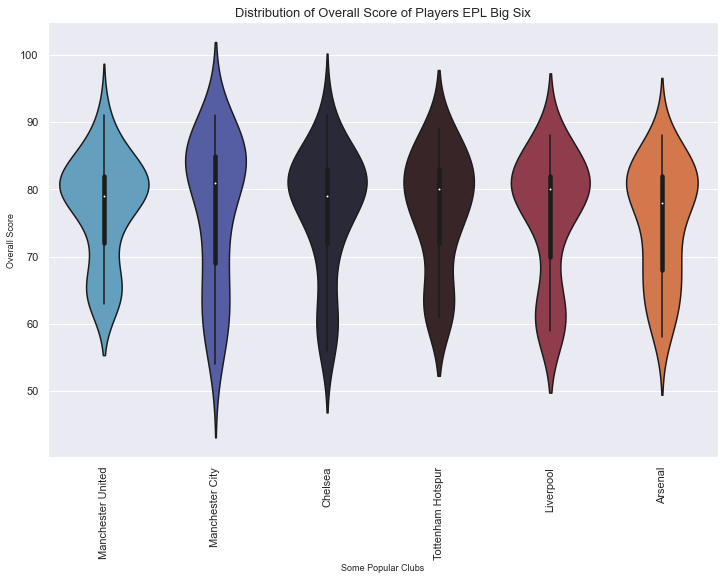

In [252]:
some_clubs = ('Manchester United', 'Liverpool', 'Arsenal', 'Manchester City','Tottenham Hotspur',  'Chelsea')

data_clubs = fifa.loc[fifa['Club'].isin(some_clubs) & fifa['Wage']]

plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.violinplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'icefire')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score of Players EPL Big Six', fontsize = 13)
plt.xticks(rotation = 90)
plt.show()